# 孔洞填充

In [1]:
import numpy as np
import cv2
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
im1 =  cv2.imread("../datas/imfill.jpg");
# Convert images to grayscale
im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)

Text(0.5,1,'DST')

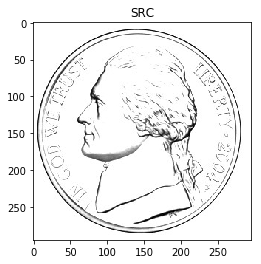

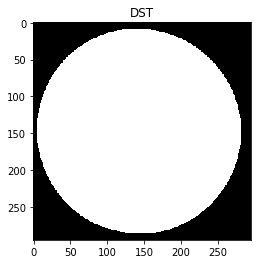

In [6]:
# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
 
th, im_th = cv2.threshold(im1_gray, 220, 255, cv2.THRESH_BINARY_INV);
 
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
plt.figure()
plt.imshow(im1_gray,'gray')
plt.title('SRC')
plt.figure()
plt.imshow(im_out,'gray')
plt.title('DST')

参考：

[1]. https://www.learnopencv.com/filling-holes-in-an-image-using-opencv-python-c/